In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("../../../")
import src.SupportPreProcesamiento as pre

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [2]:
df = pd.read_pickle("../../../datos/02_regresiones/cluster_0/01_datos_cluster0.pkl")
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
143008,15742,ES-2012-2374376,24-01-2012,26-01-2012,First Class,NF-18385,Natalie Fritzler,Consumer,Innsbruck,Tyrol,Austria,NaN,EU,Central,OFF-AR-10003377,Office Supplies,Art,"Boston Pencil Sharpener, Easy-Erase",90.63,3,0.00,14.49,11.59,Medium


In [3]:
pre.exploracion_dataframe(df,"Profit")

El número de datos es 297246 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 255956

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Postal Code,75.86



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ORDER ID tiene las siguientes valore únicos:


,count
Order ID,
ES-2014-5605089,132
ES-2013-4599518,122
ES-2013-5670479,121
IT-2014-2009199,114
IN-2013-42311,110


La columna ORDER DATE tiene las siguientes valore únicos:


,count
Order Date,
20-11-2014,791
20-09-2013,778
29-12-2014,713
25-09-2014,712
10-12-2014,702


La columna SHIP DATE tiene las siguientes valore únicos:


,count
Ship Date,
22-11-2014,812
07-12-2014,716
11-11-2014,713
07-09-2014,699
29-11-2014,659


La columna SHIP MODE tiene las siguientes valore únicos:


,count
Ship Mode,
Standard Class,179470
Second Class,58761
First Class,43784
Same Day,15231


La columna CUSTOMER ID tiene las siguientes valore únicos:


,count
Customer ID,
PO-18850,689
SW-20755,688
JG-15805,683
BC-11125,648
MP-17965,647


La columna CUSTOMER NAME tiene las siguientes valore únicos:


,count
Customer Name,
Patrick O'Brill,689
Steven Ward,688
John Grady,683
Becky Castell,648
Michael Paige,647


La columna SEGMENT tiene las siguientes valore únicos:


,count
Segment,
Consumer,154898
Corporate,89197
Home Office,53151


La columna CITY tiene las siguientes valore únicos:


,count
City,
New York City,6524
Los Angeles,5273
Philadelphia,3766
San Francisco,3700
Santo Domingo,3191


La columna STATE tiene las siguientes valore únicos:


,count
State,
California,14299
England,12837
Ile-de-France,8267
New York,7994
Texas,7174


La columna COUNTRY tiene las siguientes valore únicos:


,count
Country,
United States,71767
France,24039
Mexico,18941
Australia,17623
Germany,17592


La columna MARKET tiene las siguientes valore únicos:


,count
Market,
EU,85010
US,71767
LATAM,70975
APAC,69494


La columna REGION tiene las siguientes valore únicos:


,count
Region,
Central,87309
South,48430
North,37052
West,22806
Southeast Asia,20987


La columna PRODUCT ID tiene las siguientes valore únicos:


,count
Product ID,
OFF-AR-10003651,1225
OFF-AR-10003829,961
OFF-BI-10002799,900
OFF-BI-10003708,900
FUR-CH-10003354,784


La columna CATEGORY tiene las siguientes valore únicos:


,count
Category,
Office Supplies,193186
Furniture,55731
Technology,48329


La columna SUB-CATEGORY tiene las siguientes valore únicos:


,count
Sub-Category,
Binders,49379
Storage,35489
Art,34338
Chairs,24355
Paper,19610


La columna PRODUCT NAME tiene las siguientes valore únicos:


,count
Product Name,
Staples,1376
"Eldon File Cart, Single Width",872
"Cardinal Index Tab, Clear",839
"Ibico Index Tab, Clear",767
"Sanford Pencil Sharpener, Easy-Erase",738


La columna ORDER PRIORITY tiene las siguientes valore únicos:


,count
Order Priority,
Medium,170853
High,89408
Critical,22525
Low,14460


# Conclusiones
- VR: Profit
- Eliminar Postal Code (Demasiados Nulos)
- Eliminamos: ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product ID','Product Name']

In [4]:
cols_chao = ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product ID','Product Name']
df.drop(columns=cols_chao, inplace=True)

In [5]:
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
158410,Standard Class,Corporate,EU,Central,Furniture,Furnishings,95.22,6,0.00,37.98,9.70,Low


# Visualicemos las Variables

In [6]:
numericas, categoricas = pre.separarar_df(df)

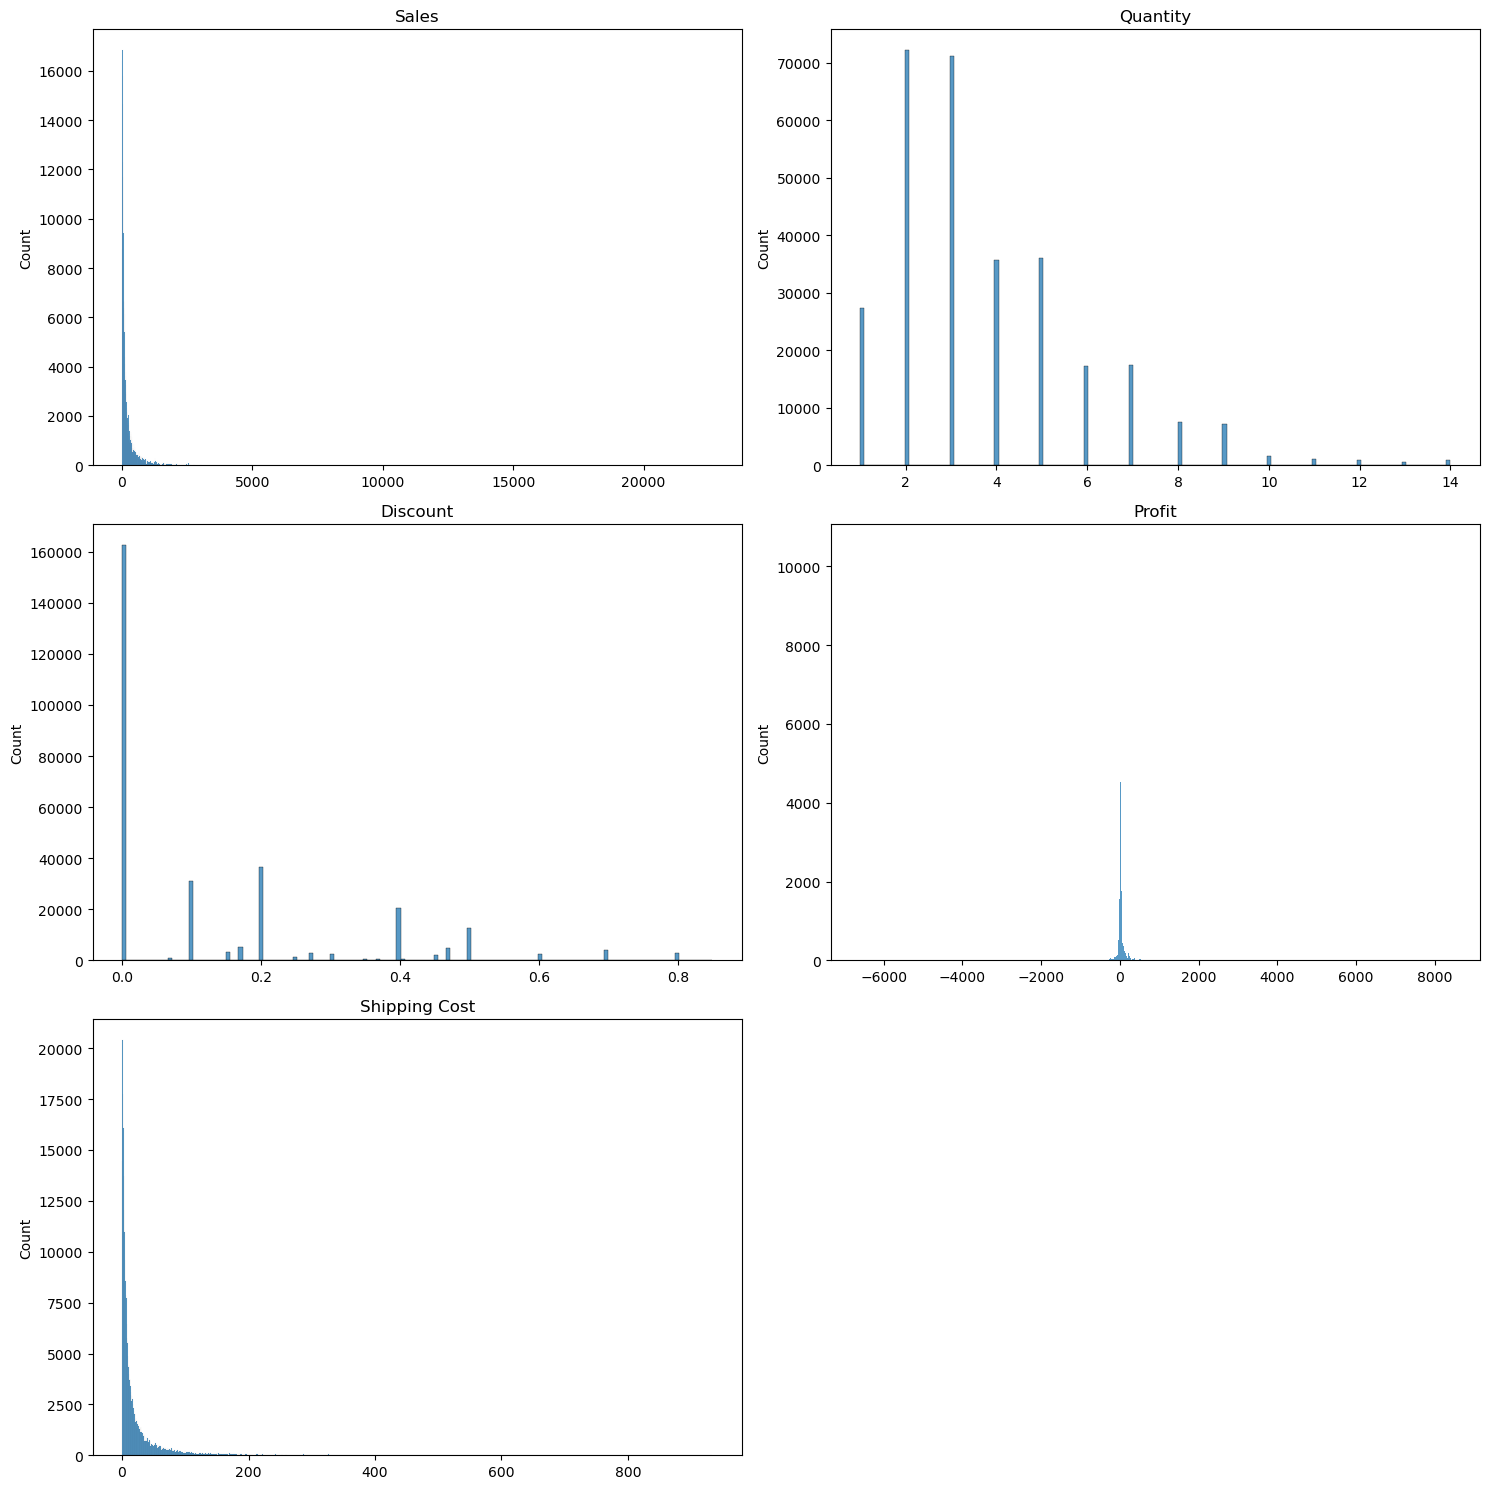

In [7]:
pre.plot_numericas(numericas,grafica_size=(15,15))

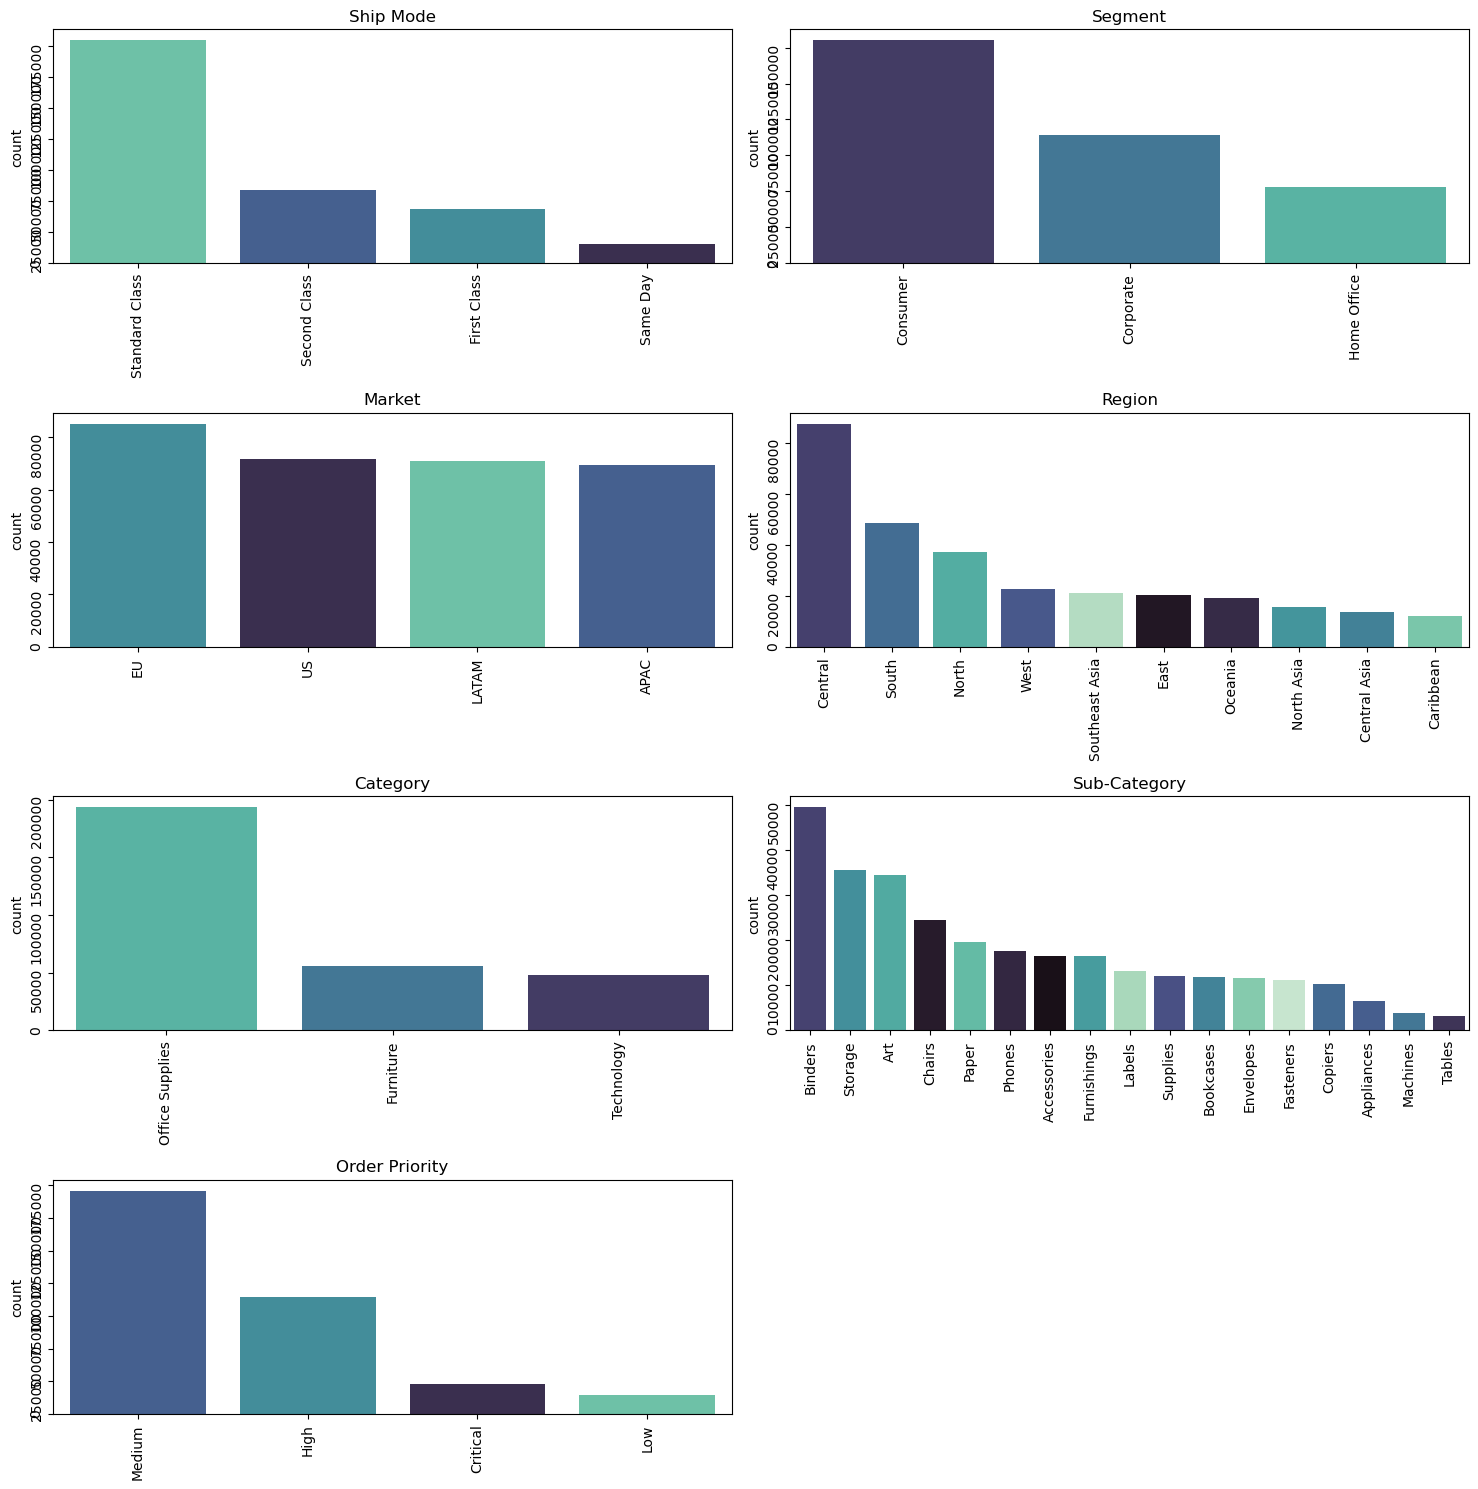

In [8]:
pre.plot_categoricas(categoricas,grafica_size=(15,15))

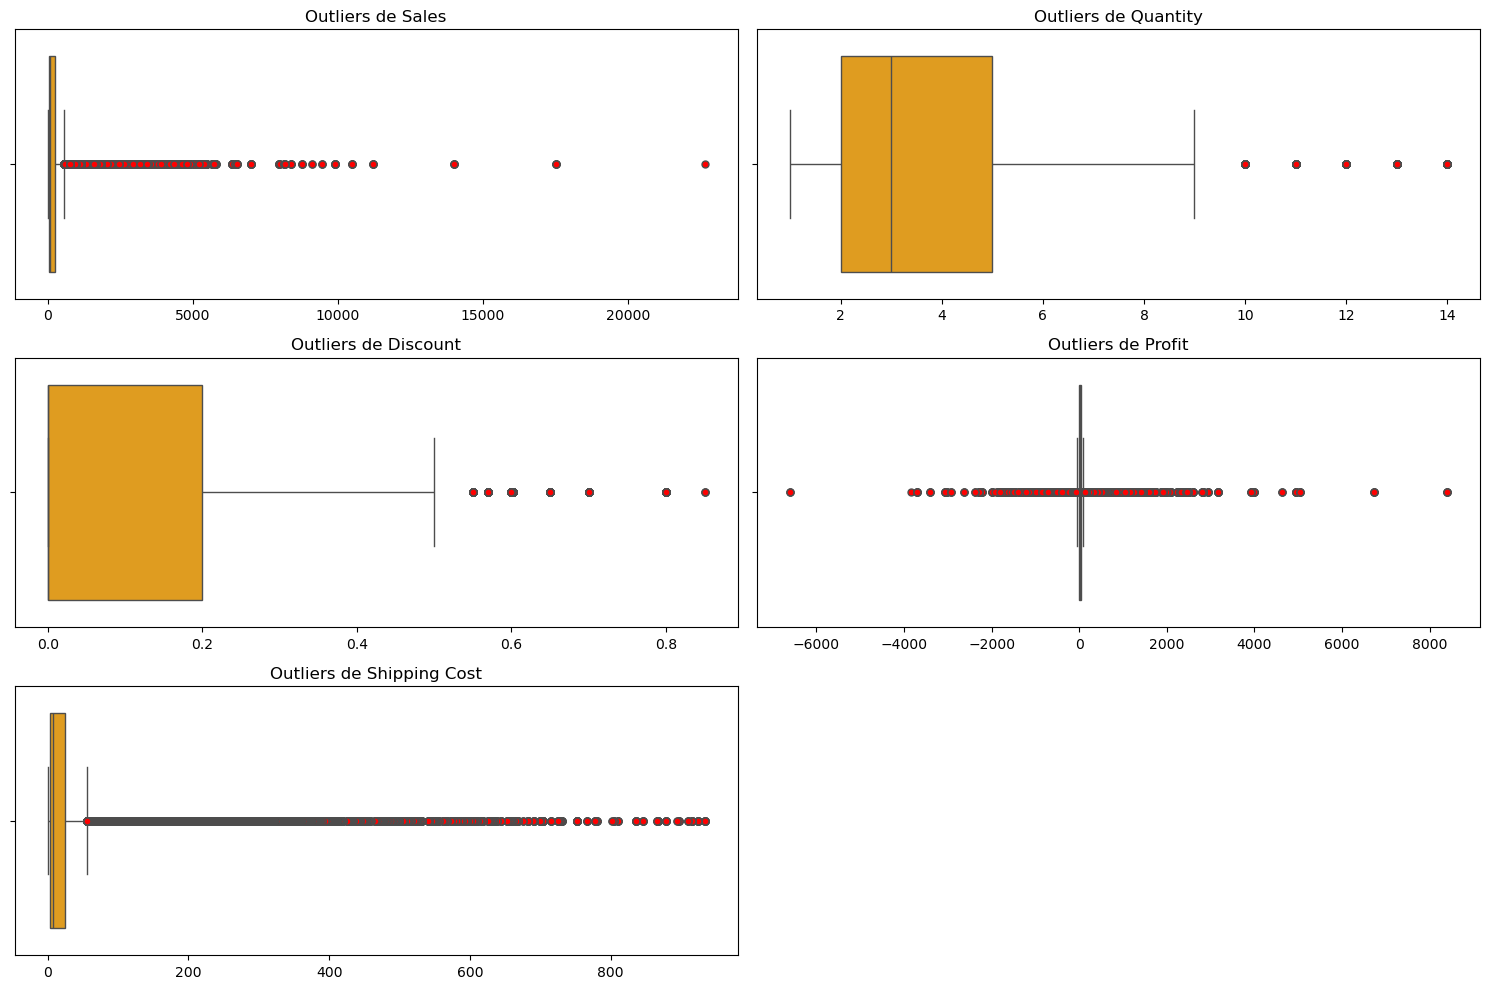

In [9]:
pre.detectar_outliers(df)

# Correlación

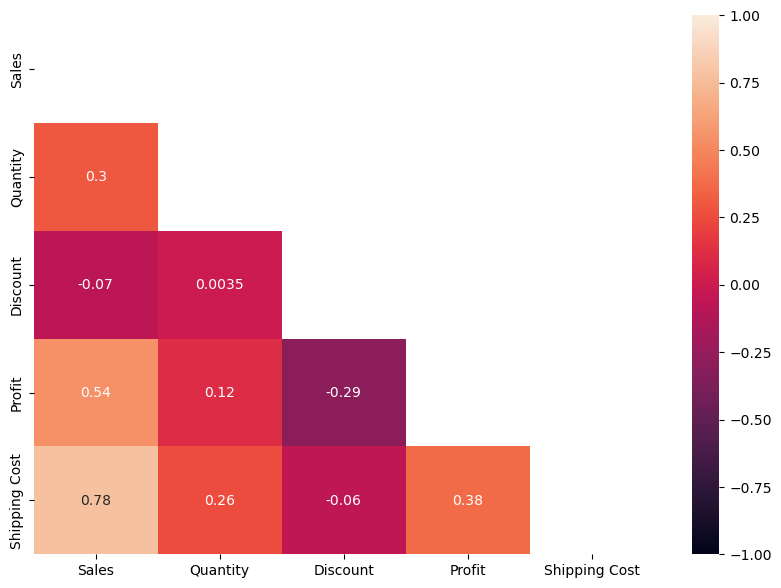

In [10]:
pre.matriz_correlacion(df)

# Relacion con VR

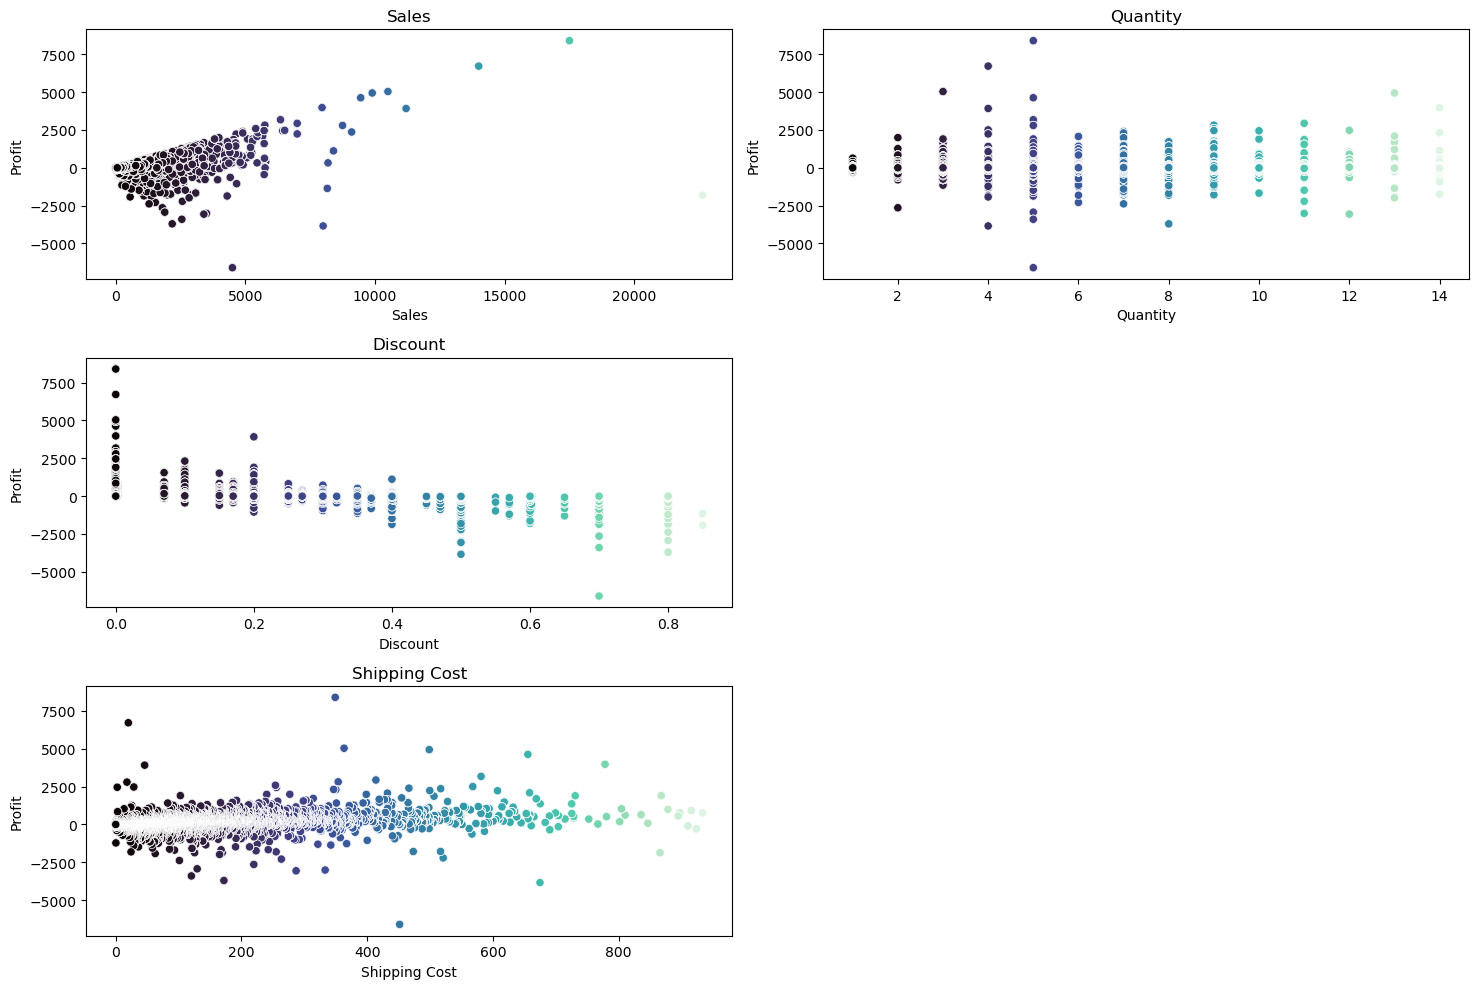

In [11]:
pre.relacion_vr_numericas(numericas,"Profit")

# Conclusiones
- Sales está altamente relacionado con Profit, vamos a eliminarla
- Discount y Quantity son escalonadas por que tienen valores muy exactos, podrían volverse categóricas

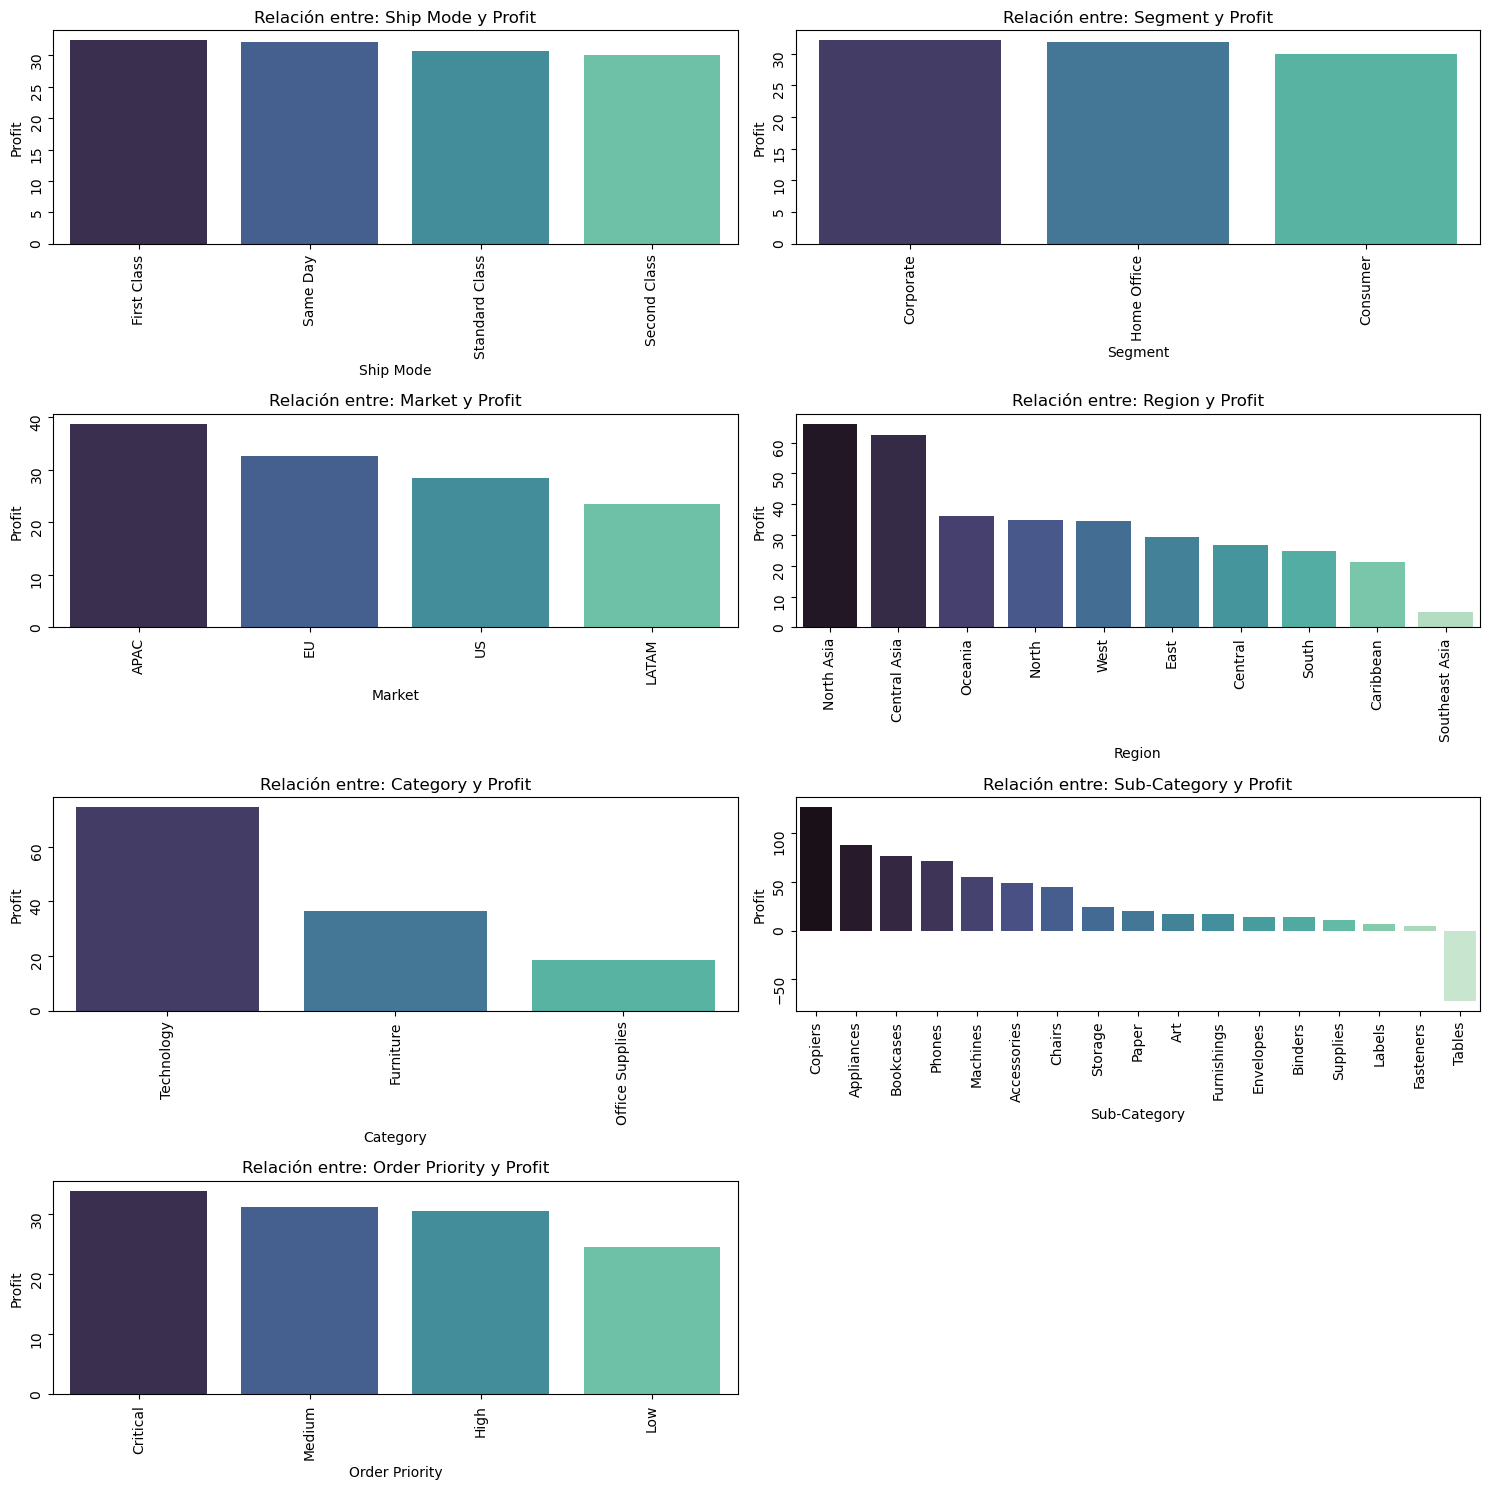

In [12]:
pre.relacion_vr_categoricas(df,"Profit",grafica_size=(15,15))

# Conclusiones
- No muchas parecen tener orden
- Parece ser que la subcategoría "Tables" sólo genera pérdidas
- El resto parece generar buen profit

# Eliminar "Sales"
- Al tener tanta relación con Profit podemos quitarla

In [13]:
df.drop(columns="Sales",inplace=True)

# Convertir a category las categorías

In [14]:
for col in categoricas.columns:
    df[col] = df[col].astype("category")

# Guardamos los cambios

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297246 entries, 0 to 375311
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Ship Mode       297246 non-null  category
 1   Segment         297246 non-null  category
 2   Market          297246 non-null  category
 3   Region          297246 non-null  category
 4   Category        297246 non-null  category
 5   Sub-Category    297246 non-null  category
 6   Quantity        297246 non-null  int64   
 7   Discount        297246 non-null  float64 
 8   Profit          297246 non-null  float64 
 9   Shipping Cost   297246 non-null  float64 
 10  Order Priority  297246 non-null  category
dtypes: category(7), float64(3), int64(1)
memory usage: 13.3 MB


In [16]:
df.to_pickle("../../../datos/02_regresiones/cluster_0/02_datos_gestionados.pkl")